In [279]:
import pandas as pd
import re
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [280]:
def labelled_scatterplot(data=None,x=None,y=None,labs=None):
    p1 = sns.scatterplot(data=data,x=x,y=y)
    for line in range(0,data.shape[0]):
        p1.text(data[x][line]+0.01, data[y][line], 
                data[labs][line], horizontalalignment='left', 
                size='medium', color='black')

In [281]:
data = pd.read_csv('nyc_real_estate.csv', index_col=False)

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       387 non-null    int64 
 1   Name             387 non-null    object
 2   City             387 non-null    object
 3   Neighbourhood    387 non-null    object
 4   Price            387 non-null    object
 5   Year Built       387 non-null    object
 6   Beds             387 non-null    object
 7   Baths            387 non-null    object
 8   Area             387 non-null    object
 9   Price(per sqft)  387 non-null    object
 10  A/C              387 non-null    object
dtypes: int64(1), object(10)
memory usage: 33.4+ KB


In [283]:
data = data.drop(labels = ['Unnamed: 0'], axis = 1)

In [284]:
data.rename(columns = {"Area" : "Area (sqft)"}, inplace = True)

In [285]:
data = data.replace("Null", pd.NA).dropna()

In [286]:
data['Price'] = data['Price'].str.replace('$', '')

<ipython-input-286-ad71304e4ed8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$', '')


In [287]:
data['Baths'] = data['Baths'].str.replace('Baths', '')

In [288]:
data['Baths'] = data['Baths'].str.replace('Bath', '')

In [289]:
data['Year Built'] = data['Year Built'].apply(lambda x : int(x[-4:]))

In [290]:
data['Beds'] = data['Beds'].apply(lambda x : x[0])
data['Beds'] = data['Beds'].replace('S', 0.5)
data['Beds'] = data['Beds'].apply(lambda x : int(x))
data['Price'] = data['Price'].str.replace(',', '').astype(int)
data['Price(per sqft)'] = data['Price(per sqft)'].str.replace('$', '')
data['Price(per sqft)'] = data['Price(per sqft)'].str.replace(',', '').astype(int)
data['Area (sqft)'] = data['Area (sqft)'].apply(lambda x : x.strip('sqft'))
data['Area (sqft)'] = data['Area (sqft)'].str.replace(',', '')
data['Area (sqft)'] = data['Area (sqft)'].apply(lambda x : int(re.search(r'\d+', x).group()))

<ipython-input-290-e92f6f8bb8f4>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Price(per sqft)'] = data['Price(per sqft)'].str.replace('$', '')


In [291]:
data.head()

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area (sqft),Price(per sqft),A/C
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,620000,2022,0,1,441,1406,Cooling only
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,730000,2022,1,1,579,1261,Cooling only
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,570000,2022,0,1,429,1329,Cooling only
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,695000,2022,1,1,632,1100,No
6,2736 Independence Ave #6J,"Bronx, NY 10463",Spuyten Duyvil,235995,1970,1,1,850,278,No


In [292]:
# Insert your code here
output = data[3:7].corr()#.unstack().sort_values(ascending=False).reset_index()
output = output.unstack().sort_values(key=abs, ascending=False).drop_duplicates().reset_index()
output.columns = ['var1', 'var2', 'correlation']
mask = output.apply(lambda x: x.var1 != x.var2, axis=1)
output = output[mask]
output[:5]

,var1,var2,correlation
1,Price,Area (sqft),0.829771
2,Year Built,Price(per sqft),0.744994
3,Year Built,Area (sqft),-0.614899
4,Price(per sqft),Area (sqft),-0.579244
5,Price,Year Built,-0.561095


In [301]:
data_pca = data[['Price', 'Year Built', 'Beds', 'Baths', 'Area (sqft)', 'Price(per sqft)']]

In [302]:
houses_X = data_pca.values
houses_Y = data_pca.index

In [303]:
from sklearn.preprocessing import scale
scale(houses_X)

array([[-0.40496747,  1.22476924, -1.17998832, -0.78875229, -0.24760062,
         1.33442156],
       [-0.27509971,  1.22476924, -0.55514218, -0.78875229, -0.24053395,
         1.00685759],
       [-0.46399827,  1.22476924, -1.17998832, -0.78875229, -0.24821511,
         1.16047379],
       ...,
       [ 0.51000991,  0.92929766,  0.06970395, -0.03884008, -0.20950206,
         0.81709639],
       [-0.80649497,  0.21172381,  0.06970395, -0.78875229, -0.21385472,
        -1.26801774],
       [ 0.14874142,  0.02177779,  1.31939622,  0.71107214, -0.17293974,
        -0.547377  ]])

In [304]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scale(houses_X))

In [306]:
X_pca_labelled = pd.concat([pd.DataFrame({'who':houses_Y}),pd.DataFrame(X_pca,columns=['pca1','pca2'])],axis=1)

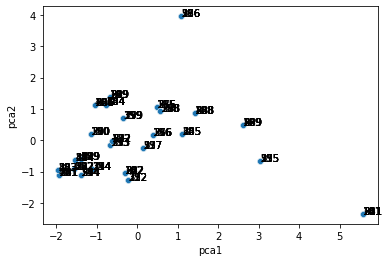

In [307]:
labelled_scatterplot(data=X_pca_labelled,x='pca1',y='pca2',labs='who')

In [308]:
pca.explained_variance_

array([2.94888652, 1.50753934])

In [309]:
np.cov(X_pca)

array([[ 0.34133892,  0.26140978,  0.40705554, ..., -0.3056848 ,
         0.78705912, -0.3808844 ],
       [ 0.26140978,  0.20019713,  0.31173796, ..., -0.23410456,
         0.60275855, -0.29169515],
       [ 0.40705554,  0.31173796,  0.48542432, ..., -0.36453708,
         0.93858848, -0.45421456],
       ...,
       [-0.3056848 , -0.23410456, -0.36453708, ...,  0.27375489,
        -0.70484788,  0.34109962],
       [ 0.78705912,  0.60275855,  0.93858848, ..., -0.70484788,
         1.81480058, -0.87824309],
       [-0.3808844 , -0.29169515, -0.45421456, ...,  0.34109962,
        -0.87824309,  0.42501139]])

In [310]:
pca.explained_variance_ratio_

array([0.48952299, 0.25025554])

<AxesSubplot:>

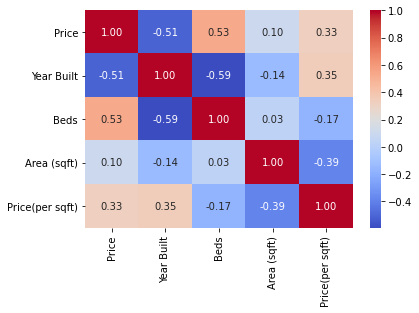

In [ ]:
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [ ]:
formula = 'Q("Year Built") ~ Baths'
model = smf.ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("Year Built")   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     57.81
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           1.45e-39
Time:                        11:54:28   Log-Likelihood:                -1226.8
No. Observations:                 251   AIC:                             2466.
Df Residuals:                     245   BIC:                             2487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1990.1589      3.140    633.768      0.000    1983.974    1996.344
Baths[T.2 ]   -26.1270      4.592     -5.690      0.000     -35.172     -17.082
Baths[T.3 ]   -25.1589     10.741     -2.342      0.020     -46.316      -4.002
Baths[T.4 ]   -85.6589      7.913    -10.825      0.000    -101.245     -70.073
Baths[T.5 ]   -70.1589     10.741     -6.532      0.000     -91.316     -49.002
Baths[T.6 ]  -145.1589     10.741    -13.514      0.000    -166.316    -124.002
==============================================================================
Omnibus:                       12.783   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                5.946
Skew:                          -0.118   Prob(JB):                       0.0512
Kurtosis:                       2.284   Cond. No.                         6.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""